In [1]:
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

pd.set_option('precision',4)
pd.set_option('display.max_rows',12)
pd.set_option('display.max_columns',12)
pd.set_option('display.float_format','{:20,.5f}'.format)

plt.style.use('seaborn')

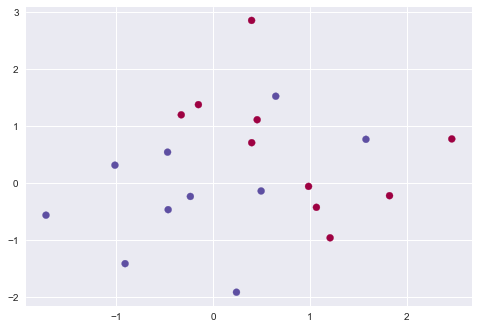

In [2]:
np.random.seed(42)

X = np.random.normal(size=40).reshape(20,2)
y = np.concatenate((np.ones(10,dtype=np.int64)*-1,np.ones(10,dtype=np.int64)))
X[y == 1,:] +=1

plt.scatter(X[:,0],X[:,1],c=(3-y),cmap='Spectral');

In [3]:
from sklearn.svm import SVC

svc = SVC(kernel='linear',C=10)
svc.fit(X,y)

SVC(C=10, kernel='linear')

C:\Users\gunha\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:316: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  ax.scatter(x_data,


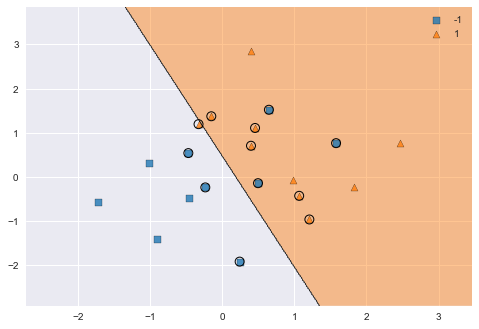

In [4]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X,y,clf=svc,X_highlight=svc.support_vectors_);

In [5]:
pd.DataFrame(svc.support_vectors_,index=svc.support_)

,0,1
0,0.49671,-0.13826
1,0.64769,1.52303
2,-0.23415,-0.23414
3,1.57921,0.76743
4,-0.46947,0.54256
6,0.24196,-1.91328
11,1.06753,-0.42475
12,0.45562,1.11092
13,-0.15099,1.37570
14,0.39936,0.70831


C:\Users\gunha\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:316: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  ax.scatter(x_data,


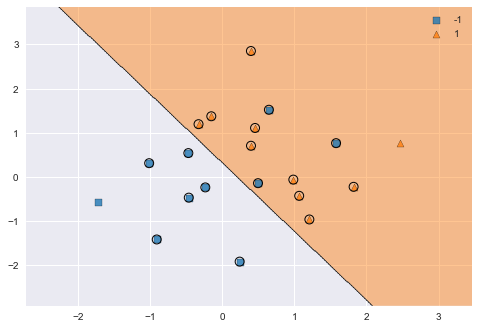

In [6]:
svc2=SVC(kernel='linear',C=0.1)
svc2.fit(X,y)

plot_decision_regions(X,y,clf=svc2,X_highlight=svc2.support_vectors_);

In [7]:
pd.DataFrame(svc2.support_vectors_,index=svc2.support_)

,0,1
0,0.49671,-0.13826
1,0.64769,1.52303
2,-0.23415,-0.23414
3,1.57921,0.76743
4,-0.46947,0.54256
...,...,...
15,0.39829,2.85228
16,0.98650,-0.05771
17,1.82254,-0.22084
18,1.20886,-0.95967


In [8]:
from sklearn.model_selection import GridSearchCV

svc3 = SVC(kernel='linear')
c_space = np.array([0.001,0.01,0.1,1,5,10,100])
param_grid={'C':c_space}

tune=GridSearchCV(svc3,param_grid,cv=10)
tune.fit(X,y)

tune.cv_results_
tune.best_params_

{'C': 0.001}

In [9]:
pd.DataFrame(tune.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,...,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.00029,0.00045,0.00020,0.00039,0.00100,{'C': 0.001},...,1.00000,0.50000,0.50000,0.75000,0.25000,1
1,0.00029,0.00045,0.00010,0.00029,0.01000,{'C': 0.01},...,1.00000,0.50000,0.50000,0.75000,0.25000,1
2,0.00020,0.00039,0.00020,0.00039,0.10000,{'C': 0.1},...,1.00000,0.50000,0.50000,0.75000,0.25000,1
3,0.00020,0.00039,0.00010,0.00029,1.00000,{'C': 1.0},...,1.00000,0.50000,0.50000,0.75000,0.25000,1
4,0.00020,0.00039,0.00020,0.00039,5.00000,{'C': 5.0},...,1.00000,0.50000,0.50000,0.75000,0.25000,1
5,0.00029,0.00045,0.00020,0.00039,10.00000,{'C': 10.0},...,1.00000,0.50000,0.50000,0.75000,0.25000,1
6,0.00039,0.00048,0.00049,0.00049,100.00000,{'C': 100.0},...,1.00000,0.50000,0.50000,0.75000,0.25000,1


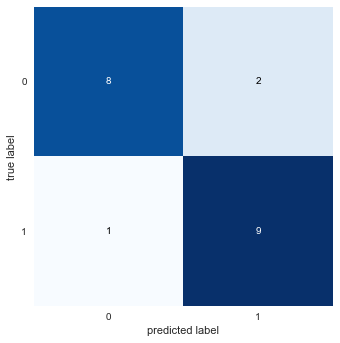

In [10]:
from sklearn.utils import resample

np.random.seed(42)
X_test=np.random.normal(size=40).reshape(20,2)
y_test=resample(np.concatenate((np.ones(10,dtype=np.int64)*-1,np.ones(10,dtype=np.int64))),
               replace=True,
               n_samples=20,random_state=42)
X_test[y_test==1,:]+=1

y_pred = tune.predict(X_test)

from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

plot_confusion_matrix(confusion_matrix(y_test,y_pred));

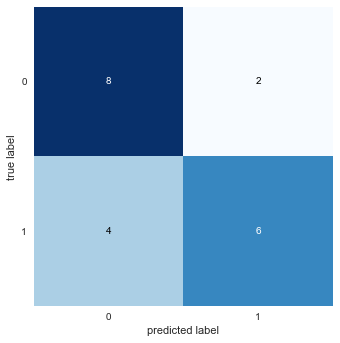

In [11]:
svc4 = SVC(kernel='linear',C=0.01)
svc4.fit(X_test,y_test)

y_pred4 = svc4.predict(X_test)

plot_confusion_matrix(confusion_matrix(y_test,y_pred4));

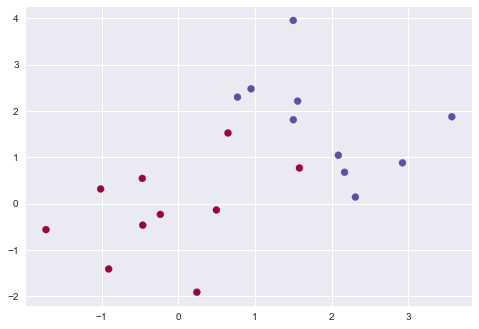

In [12]:
X[y==1,:] += 1.1
plt.scatter(X[:,0],X[:,1],c=(y+5)/2, cmap='Spectral');

C:\Users\gunha\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:316: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  ax.scatter(x_data,


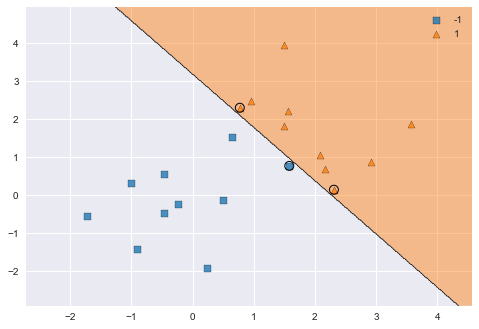

In [13]:
svc5=SVC(kernel='linear',C=1e5)
svc5.fit(X,y)

plot_decision_regions(X,y,clf=svc5,X_highlight=svc5.support_vectors_);

C:\Users\gunha\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:316: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  ax.scatter(x_data,


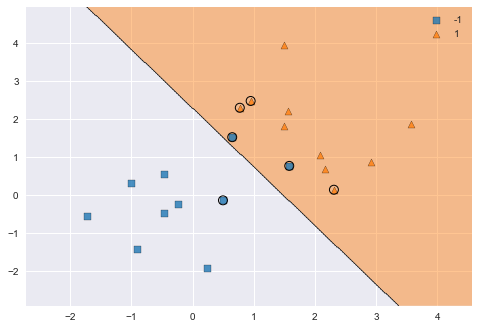

In [14]:
svc6=SVC(kernel='linear',C=1)
svc6.fit(X,y)

plot_decision_regions(X,y,clf=svc6,X_highlight=svc6.support_vectors_);

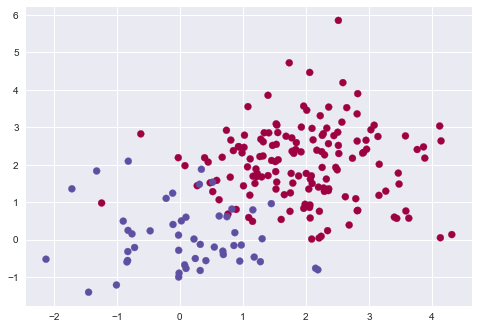

In [15]:
from sklearn.model_selection import train_test_split

np.random.seed(42)

X=np.random.normal(size=400).reshape(200,2)
X[0:100,:]+=2
X[100:150,:]+=2
y=np.concatenate((np.full(150,1,dtype=np.int64),np.full(50,2,dtype=np.int64)))

X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.5,test_size=0.5,random_state=42)

plt.scatter(X[:,0],X[:,1],c=y,cmap='Spectral');

C:\Users\gunha\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:316: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  ax.scatter(x_data,


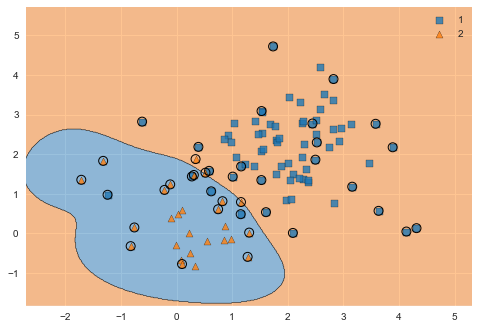

In [16]:
svm=SVC(kernel='rbf',gamma=1,C=1)
svm.fit(X_train,y_train)

plot_decision_regions(X_train,y_train,clf=svm,X_highlight=svm.support_vectors_);

C:\Users\gunha\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:316: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  ax.scatter(x_data,


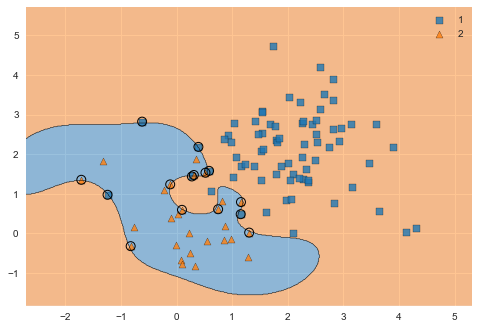

In [17]:
svm2=SVC(kernel='rbf',gamma=1,C=1e5)
svm2.fit(X_train,y_train)

plot_decision_regions(X_train,y_train,clf=svm2,X_highlight=svm2.support_vectors_);

In [18]:
svm3 = SVC(kernel='rbf')
c_space = np.array([0.1,1,10,100,1000])
g_space = np.array([0.5,1,2,3,4])
param_grid={'C':c_space,'gamma':g_space}

tune=GridSearchCV(svm3,param_grid,cv=10)
tune.fit(X_train,y_train)

tune.cv_results_
tune.best_params_

{'C': 1.0, 'gamma': 0.5}

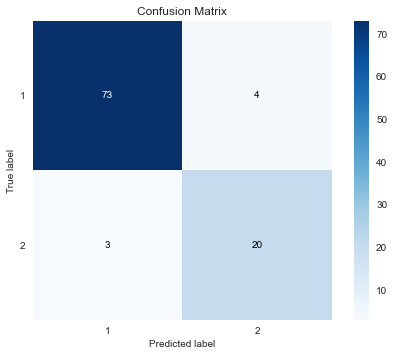

In [19]:
y_pred = tune.predict(X_test)

import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(y_test,y_pred);

In [20]:
svm4=SVC(kernel='rbf',gamma=2,C=1,probability=True)
svm4.fit(X_train,y_train)

svm5=SVC(kernel='rbf',gamma=50,C=1,probability=True)
svm5.fit(X_train,y_train)

y_probas4=svm4.predict_proba(X_train)
y_probas5=svm5.predict_proba(X_train)

C:\Users\gunha\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


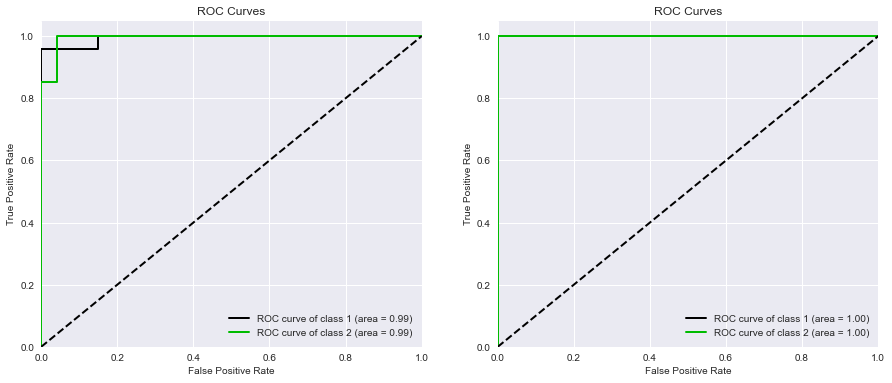

In [23]:
f,axes=plt.subplots(1,2,sharex=False,sharey=False)
f.set_figheight(6)
f.set_figwidth(15)

skplt.metrics.plot_roc_curve(y_train,y_probas4,curves=['each_class'],ax=axes[0])
skplt.metrics.plot_roc_curve(y_train,y_probas5,curves=['each_class'],ax=axes[1]);

C:\Users\gunha\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\gunha\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


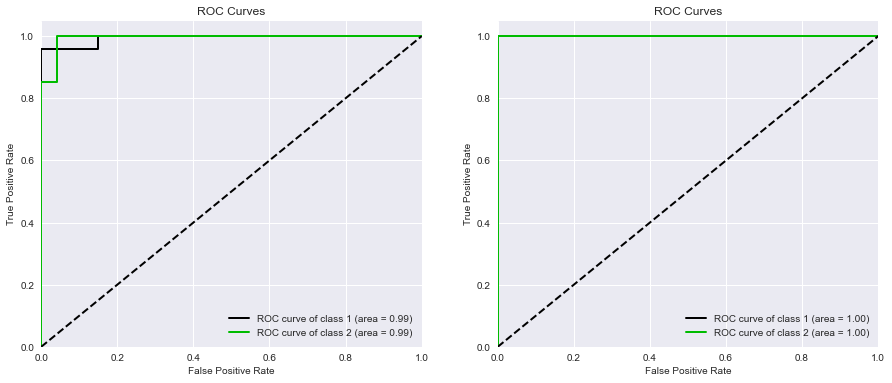

In [24]:
y_probas_test_4 = svm4.predict_proba(X_test)
y_probas_test_5 = svm5.predict_proba(X_test)

f,axes=plt.subplots(1,2,sharex=False,sharey=False)
f.set_figheight(6)
f.set_figwidth(15)

skplt.metrics.plot_roc_curve(y_train,y_probas4,curves=['each_class'],ax=axes[0])
skplt.metrics.plot_roc_curve(y_train,y_probas5,curves=['each_class'],ax=axes[1]);

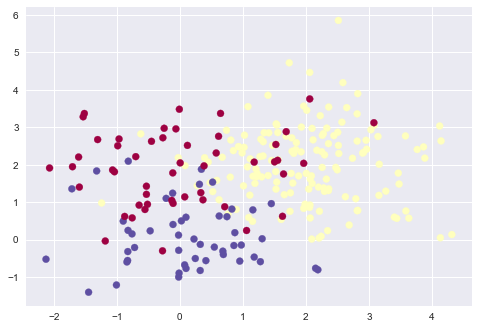

In [25]:
np.random.seed(42)

X=np.random.normal(size=400).reshape(200,2)
X[0:100,:]+=2
X[100:150,:]+=2
y=np.concatenate((np.full(150,1,dtype=np.int64),np.full(50,2,dtype=np.int64)))

X=np.concatenate((X,np.random.normal(size=100).reshape(50,2)))
y = np.concatenate((y,np.full(50,0,dtype=np.int64)))

X[y==0,1]+=2

plt.scatter(X[:,0],X[:,1],c=y+1,cmap='Spectral');

C:\Users\gunha\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:316: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  ax.scatter(x_data,


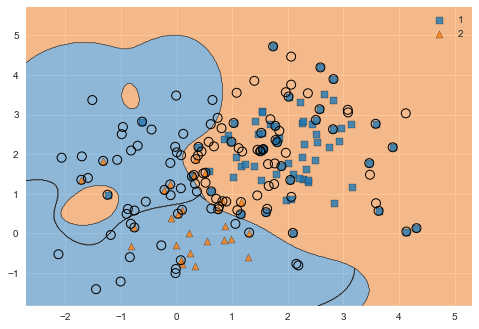

In [26]:
svm_m=SVC(kernel='rbf',C=10,gamma=1)
svm_m.fit(X,y)

plot_decision_regions(X_train,y_train,clf=svm_m,X_highlight=svm_m.support_vectors_);